In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

##  Datset path location using glob


In [2]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')


In [3]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))

Building house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  200


In [4]:
dataset_classes=[building_house,mosque,temple,tinshed]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  4


## Make data and laebls using keras.preprocessing.image

In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
data=[]
labels=[]

In [7]:
# Building house
for i in building_house:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(0)

In [8]:
#mosque
for i in mosque:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(1)

In [9]:
#temple
for i in temple:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(2)

In [10]:
#tinshed
for i in tinshed:
    img=image.load_img(i)
    img=image.img_to_array(img)
    data.append(img)
    labels.append(3)

## Length of data and types

In [11]:
print('Total data: ',len(data))
print('Labels of data: ',len(labels))

Total data:  950
Labels of data:  950


In [12]:
print('Data type: ',type(data))
print('Labels type: ',type(labels))

Data type:  <class 'list'>
Labels type:  <class 'list'>


## Convert data into numpy array

In [13]:
data_array=np.array(data)
labels_array=np.array(labels)

In [14]:
print('Data type: ',type(data_array))
print('Labels type: ',type(labels_array))

Data type:  <class 'numpy.ndarray'>
Labels type:  <class 'numpy.ndarray'>


## Data split using train test split 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test =train_test_split(data_array,labels_array,test_size=0.2,random_state=42)

In [17]:
print('x train shape: ',x_train.shape)
print('x test shape: ',x_test.shape)
print('y train shape: ',y_train.shape)
print('y test shape: ',y_test.shape)

x train shape:  (760, 224, 224, 3)
x test shape:  (190, 224, 224, 3)
y train shape:  (760,)
y test shape:  (190,)


## plot random image and label
if range(0,255) ->  int then plt.imshow(img)

range(0.0,255.0) ->float scale the image into (0,1) by dividing 255 then plt.imshow()

In [18]:
random_image=x_train[0]
random_image_labels=y_train[0]
print('image shape: ',random_image.shape)
print('Data types of image is : ',random_image.dtype)
print('image output label: ',random_image_labels)

image shape:  (224, 224, 3)
Data types of image is :  float32
image output label:  3


Label:  3


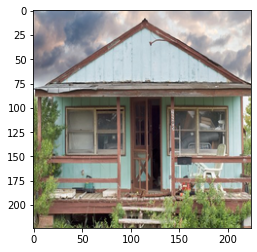

In [19]:
print('Label: ',random_image_labels)
plt.imshow(random_image/255)
plt.show()

## Normalize the data 
x_test: [0,1]

In [20]:
print('Data range is [0,255]: ',x_train[0][0][0])

Data range is [0,255]:  [145. 152. 169.]


In [21]:
x_test_normalize=x_test/255
x_train_normalize=x_train/255

In [22]:
print('Data range is [0,1]: ',x_train_normalize[0][0][0])

Data range is [0,1]:  [0.5686275  0.59607846 0.6627451 ]


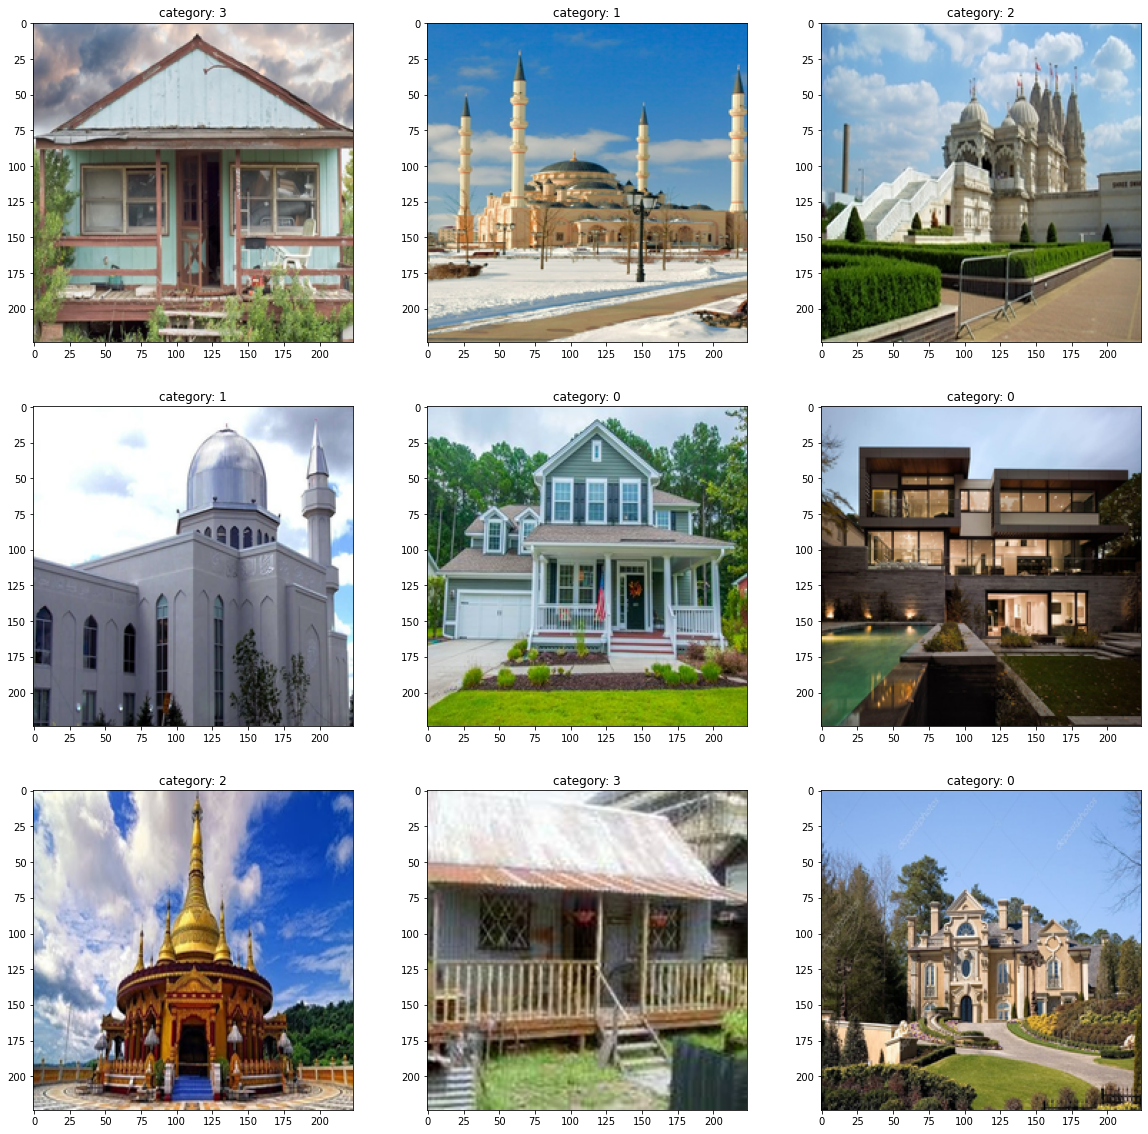

In [23]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train_normalize[i])
    plt.title('category: '+str(y_train[i]))
plt.show()

## Categorial the labels using one hot encoding Keras

In [24]:
from tensorflow.keras.utils import to_categorical


In [25]:
print('Non categorical values : ',y_test[:10])

Non categorical values :  [0 3 2 3 3 2 3 3 1 0]


### Categorical y_test and y_train

In [26]:
y_test_categorical=to_categorical(y_test)
y_train_categorical=to_categorical(y_train)

In [27]:
print('Categorical values : \n',y_test_categorical[:10])

Categorical values : 
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]



## Define model architecture
### CNN requires x_test norlalize values [0,1] and y_test categorical values [0. 0. 1. 0.]

In [28]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

In [29]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(total_class,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [31]:
model.layers

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Compile the model using loss and optimizer

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the model and save the model suing call backs fucntion

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [34]:
checkpointer.filepath

'building.model.best.hdf5'

In [35]:
x_test_normalize.shape

(190, 224, 224, 3)

In [36]:
y_test_categorical.shape

(190, 4)

In [37]:
history=model.fit(x_test_normalize,y_test_categorical,epochs=10,batch_size=32,steps_per_epoch=3,callbacks=[checkpointer])

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 3.8739 - accuracy: 0.2292
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.4074 - accuracy: 0.2447
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.3757 - accuracy: 0.2708
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 1.3255 - accuracy: 0.3830
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 1.2778 - accuracy: 0.3438
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 1.1620 - accuracy: 0.5213
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.9994 - accuracy: 0.5625
Epoch 8/10
3/3 [==============================] - 4s 1s/step - loss: 1.1867 - accuracy: 0.5745
Epoch 9/10
3/3 [==============================] - 5s 2s/step - loss: 0.8965 - accuracy: 0.6146
Epoch 10/10
3/3 [==============================] - 5s 2s/step - loss: 1.2300 - accuracy: 0.5106


## Testing data using test set

In [38]:
loss_accuracy=model.evaluate(x_test_normalize,y_test_categorical)
loss_accuracy

6/6 [==============================] - 3s 445ms/step - loss: 0.9901 - accuracy: 0.6158


[0.9900678992271423, 0.6157894730567932]

## Testing a random image

(1, 224, 224, 3)
[[0.00000e+00 1.00000e+00 3.62237e-15 0.00000e+00]]
1


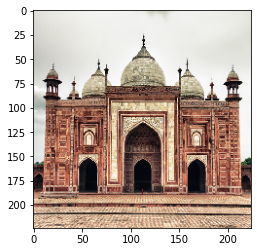

In [52]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

# Layer Visualization 

In [53]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'dropout', 'flatten', 'dense', 'dropout_1', 'dense_1']


In [54]:
model.layers

In [55]:
from tensorflow.keras.models import Model

In [56]:
conv2d_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d').output)
conv2d_1_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
conv2d_2_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
conv2d_3_ouput=Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)

In [57]:
conv2d_features=conv2d_ouput.predict(test_image)
conv2d_1_features=conv2d_1_ouput.predict(test_image)
conv2d_2_features=conv2d_2_ouput.predict(test_image)
conv2d_3_features=conv2d_3_ouput.predict(test_image)
print('Conv layer feature output shape: ',conv2d_features.shape)
print('Conv_1 layer feature output shape: ',conv2d_1_features.shape)
print('Conv_2 layer feature output shape: ',conv2d_2_features.shape)
print('Conv_3 layer feature output shape: ',conv2d_3_features.shape)

Conv layer feature output shape:  (1, 224, 224, 32)
Conv_1 layer feature output shape:  (1, 112, 112, 64)
Conv_2 layer feature output shape:  (1, 56, 56, 128)
Conv_3 layer feature output shape:  (1, 28, 28, 256)


([], [])

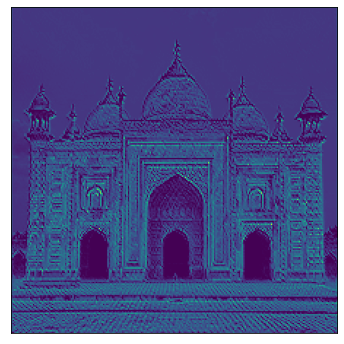

In [69]:
plt.figure(figsize=(6,6))
plt.imshow(conv2d_features[0,:,:,7])
plt.xticks([])
plt.yticks([])

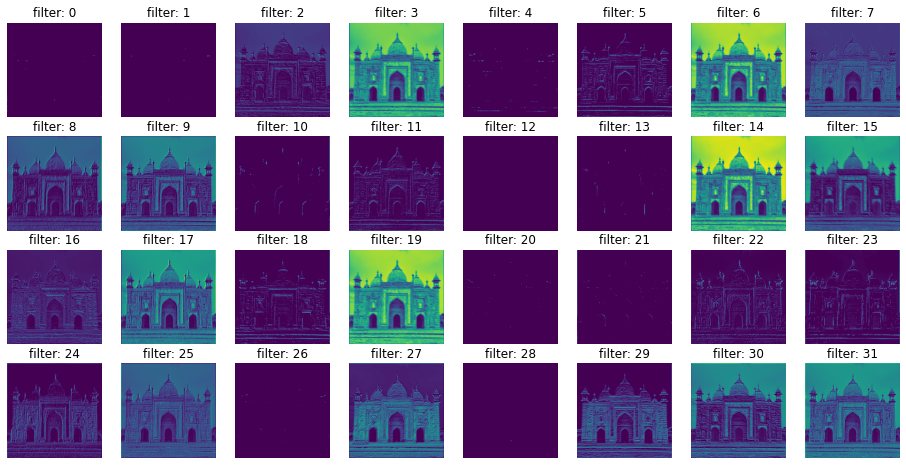

In [61]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_features[0, :, :, i])
plt.show()

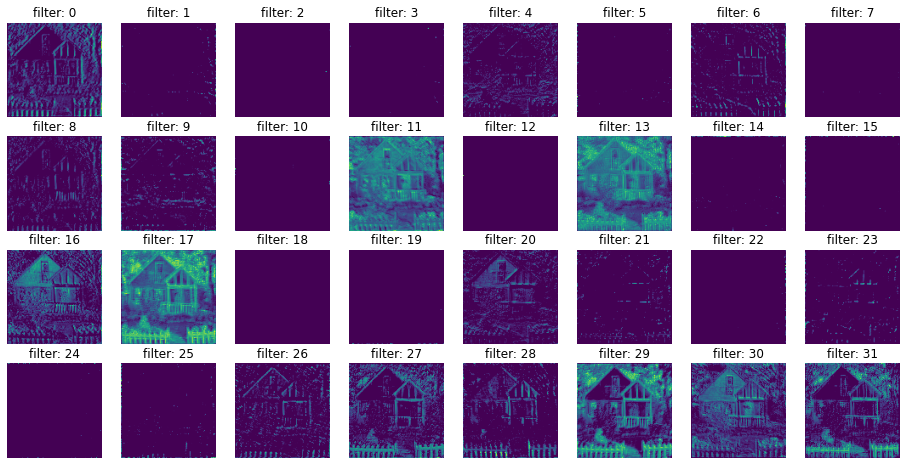

In [47]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_1_features[0, :, :, i])
plt.show()

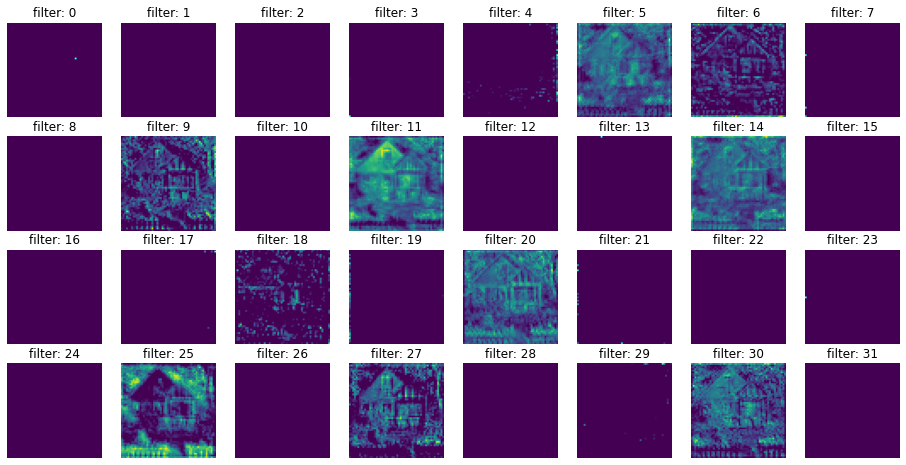

In [48]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_2_features[0, :, :, i])
plt.show()

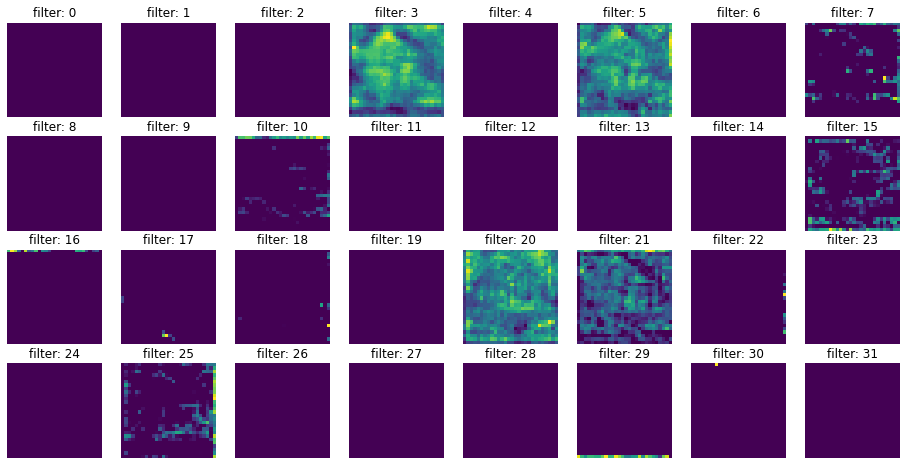

In [49]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_3_features[0, :, :, i])
plt.show()